# From Catalog to Xarray - Starting to do research with Cloud Data

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import STATES

In [2]:
from distributed import Client
client = Client()
client

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44761 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/jbusecke/cmip/proxy/44761/status,
Dashboard: /user/jbusecke/cmip/proxy/44761/status,Workers: 4
Total threads: 4,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39167,Workers: 4
Dashboard: /user/jbusecke/cmip/proxy/44761/status,Total threads: 4
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:38761,Total threads: 1
Dashboard: /user/jbusecke/cmip/proxy/40409/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:40685,


😎 Everything is cooler with a dashboard, click the "Launch dashboard in JupyterLab" button ☝️

## The LEAP Catalog (in collaboration with Carbonplan)

Lets take a look at our  [LEAP Data Catalog](https://catalog.leap.carbonplan.org/) (Final URL still pending).

Navigate to any of the datasets, click on the ➕ next to a dataset, and get a copy/pasteable snippet!

If you want to follow along with me, go for "Sea-surface altimetry data from The Copernicus Marine Environment", but you can also choose another dataset (not all the steps demonstrated might work with particular datasets though). 

In [3]:

import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-cmems-duacs'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [4]:
ds

<xarray.Dataset> Size: 517GB
Dimensions:    (time: 8901, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    crs        int32 4B ...
    lat_bnds   (time, latitude, nv) float32 51MB dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * nv         (nv) int32 8B 0 1
  * time       (time) datetime64[ns] 71kB 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 74GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

## Lets get familiar with Xarray

In [5]:
# lets look at only one of the variables
ds['sla']

# we can also do
ds.sla

<xarray.DataArray 'sla' (time: 8901, latitude: 720, longitude: 1440)> Size: 74GB
dask.array<open_dataset-sla, shape=(8901, 720, 1440), dtype=float64, chunksize=(5, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 4B ...
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 71kB 1993-01-01 1993-01-02 ... 2017-05-15
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

In [6]:
# Select only the first two years

# We could do:
ds.isel(time=slice(0,2*365))

# But we can also index the dimensions by values
ds_short = ds.sel(time=slice('1993', '1994'))
ds_short

<xarray.Dataset> Size: 42GB
Dimensions:    (time: 730, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    crs        int32 4B ...
    lat_bnds   (time, latitude, nv) float32 4MB dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * nv         (nv) int32 8B 0 1
  * time       (time) datetime64[ns] 6kB 1993-01-01 1993-01-02 ... 1994-12-31
Data variables:
    adt        (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 6GB dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

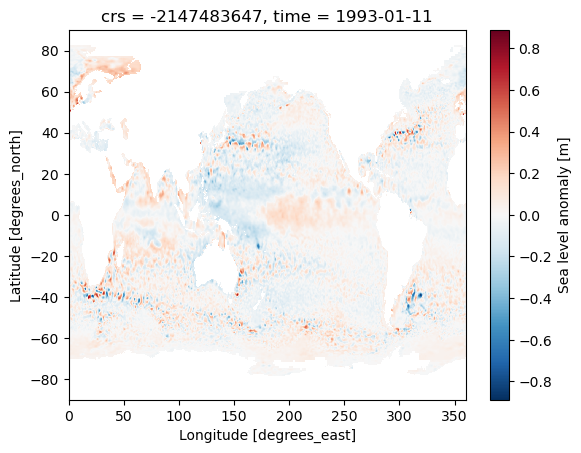

In [7]:
# lets plot a map (by combining what we did before)
ds_short['sla'].isel(time=10).plot()

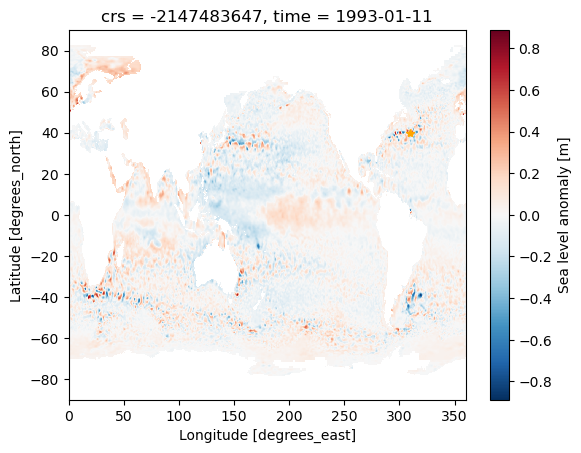

In [8]:
# Now lets mark a location and plot it on the map
point_lon, point_lat = (310, 40)
ds_short['sla'].isel(time=10).plot()
plt.plot(point_lon, point_lat, marker='*', color='orange')

## Now lets extract a timeseries at that location

In [9]:
timeseries = ds_short['sla'].sel(longitude=point_lon, latitude=point_lat, method='nearest').load()
timeseries

<xarray.DataArray 'sla' (time: 730)> Size: 6kB
array([ 0.2004,  0.1712,  0.1313,  0.0986,  0.056 ,  0.0213, -0.005 ,
       -0.0324, -0.0406, -0.0474, -0.0521, -0.0488, -0.0458, -0.0309,
        0.0275,  0.0301,  0.0352,  0.0514,  0.0634,  0.079 ,  0.0926,
        0.1022,  0.1182,  0.1229,  0.1273,  0.1211,  0.1123,  0.1647,
        0.1541,  0.1415,  0.1171,  0.098 ,  0.0829,  0.0618,  0.032 ,
       -0.0069, -0.0467, -0.1198, -0.1808, -0.2305, -0.2382, -0.2982,
       -0.3482, -0.4017, -0.4462, -0.4857, -0.515 , -0.53  , -0.5333,
       -0.5391, -0.5022, -0.4808, -0.4517, -0.4186, -0.3655, -0.3042,
       -0.2488, -0.1843, -0.1299, -0.0803, -0.0365, -0.0035,  0.0361,
        0.0823,  0.104 ,  0.1365,  0.1612,  0.2027,  0.2102,  0.2232,
        0.2327,  0.238 ,  0.2383,  0.2292,  0.2246,  0.221 ,  0.2164,
        0.1972,  0.1878,  0.1746,  0.1619,  0.1582,  0.1481,  0.1334,
        0.1405,  0.1319,  0.1373,  0.1395,  0.1491,  0.1575,  0.1625,
        0.1709,  0.1816,  0.1946,  0.2033,  0.2106,  0.2209,  0.218 ,
        0.2236,  0.2235,  0.2337,  0.2363,  0.2295,  0.2239,  0.2184,
        0.1998,  0.1877,  0.1739,  0.1646,  0.1551,  0.1546,  0.1359,
        0.1198,  0.099 ,  0.0792,  0.0645,  0.0533,  0.0439,  0.029 ,
        0.0203, -0.0044, -0.0162, -0.0324, -0.0566, -0.0688, -0.0873,
       -0.0987, -0.1104, -0.1352, -0.1563, -0.1841, -0.2064, -0.2268,
       -0.2475, -0.2723, -0.2908, -0.3152, -0.3415, -0.3651, -0.3861,
...
        0.5861,  0.5838,  0.5877,  0.5648,  0.5515,  0.5518,  0.5431,
        0.5341,  0.5246,  0.5144,  0.504 ,  0.4892,  0.4747,  0.4654,
        0.4585,  0.4464,  0.4359,  0.4315,  0.4194,  0.4091,  0.3927,
        0.3759,  0.3553,  0.351 ,  0.3245,  0.2924,  0.2606,  0.2346,
        0.2041,  0.1655,  0.1313,  0.0923,  0.0575,  0.0359, -0.0009,
       -0.0401, -0.0684, -0.0921, -0.1137, -0.1352, -0.1556, -0.1782,
       -0.195 , -0.2046, -0.2154, -0.2267, -0.2344, -0.2162, -0.2058,
       -0.2159, -0.2222, -0.2234, -0.2131, -0.1915, -0.1733, -0.1568,
       -0.1389, -0.1279, -0.108 , -0.089 , -0.0533, -0.0313, -0.0147,
       -0.0076,  0.0118,  0.0312,  0.0551,  0.0562,  0.0827,  0.098 ,
        0.1296,  0.1555,  0.1862,  0.2064,  0.2401,  0.2668,  0.3008,
        0.3304,  0.355 ,  0.3797,  0.3955,  0.4111,  0.4217,  0.4275,
        0.4377,  0.4279,  0.4252,  0.4188,  0.423 ,  0.4234,  0.4358,
        0.436 ,  0.4315,  0.4316,  0.4502,  0.4574,  0.482 ,  0.4962,
        0.5055,  0.5187,  0.5386,  0.5592,  0.5814,  0.6136,  0.6266,
        0.6296,  0.6398,  0.6379,  0.6362,  0.6367,  0.6365,  0.6298,
        0.6233,  0.6116,  0.6044,  0.5937,  0.5807,  0.5716,  0.5607,
        0.5538,  0.5446,  0.5356,  0.5185,  0.5188,  0.5028,  0.5156,
        0.5071,  0.5019,  0.4926,  0.4767,  0.4875,  0.461 ,  0.4382,
        0.4141,  0.3858])
Coordinates:
    crs        int32 4B -2147483647
    latitude   float32 4B 40.12
    longitude  float32 4B 310.1
  * time       (time) datetime64[ns] 6kB 1993-01-01 1993-01-02 ... 1994-12-31
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    grid_mapping:   crs
    long_name:      Sea level anomaly
    standard_name:  sea_surface_height_above_sea_level
    units:          m

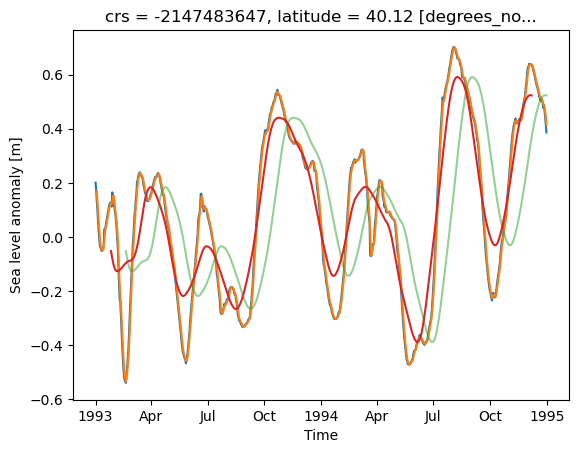

In [10]:
timeseries.plot()

# Or how about we smooth that timeseries a little bit with a rolling average
timeseries.rolling(time=3).mean().plot()

# Or a lot
timeseries.rolling(time=50).mean().plot(alpha=0.5)

# hmmm that isnt centered right.
# Or a lot
timeseries.rolling(time=50, center=True).mean().plot()

## And for the final exercise - A map of standard deviation in time

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


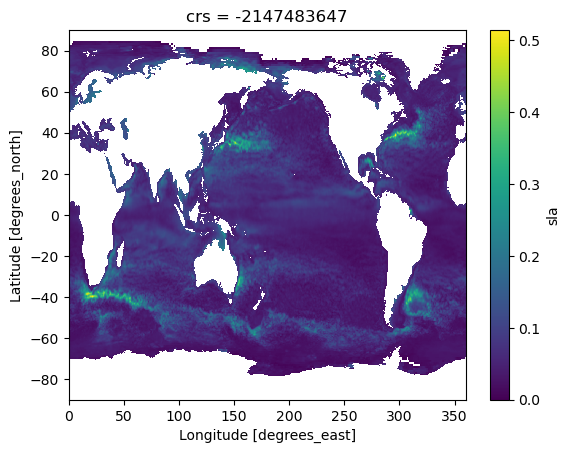

In [11]:
stdv = ds_short.sla.std('time').load()
stdv.plot()

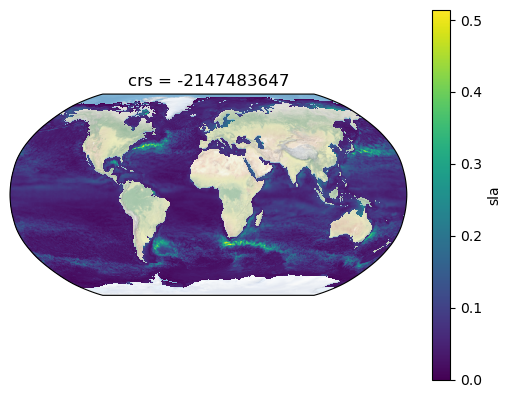

In [12]:
a = stdv.plot(subplot_kws={'projection':ccrs.Robinson()}, transform=ccrs.PlateCarree())
# a.axes.coastlines(color='orange') # this is silly
a.axes.stock_img()